<a href="https://colab.research.google.com/github/ParsaMohammadpour/heterogeneity-of-complex-networks/blob/main/index_to_quantifying_heterogeneity_of_complex_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### installing networkx

In [1]:
!pip install networkx

### imports

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

### H

In [3]:
def calculate_H(graph):
  degrees = list(sorted([val for (node, val) in graph.degree()]))
  H = 0
  deg_mean = np.mean(degrees)
  for i in degrees:
    for j in degrees:
      H += abs(i - j)
  H /= 2*len(graph)*len(graph)*deg_mean
  return H

### $$S_b$$

In [4]:
def calculate_Sb(graph):
  degrees = list(sorted([val for (node, val) in graph.degree()]))
  deg_sum = np.sum(degrees)
  ws = [i/deg_sum for i in degrees]
  cum_ws = np.cumsum(ws)
  Sb = 0.5 * (cum_ws[0])
  for i in range(1, len(cum_ws)):
    Sb += 0.5 * (cum_ws[i] + cum_ws[i-1])
  return Sb / len(graph)

def calculate_H_with_Sb(graph):
  return 1 - 2*calculate_Sb(graph)

### graph holder

In [5]:
class Graph_comparator:
  def __init__(self, graph):
    self.graph = graph
    self.degrees = list(sorted([val for (node, val) in graph.degree()]))
    self.deg_sum = np.sum(self.degrees)
    self.deg_mean = np.mean(self.degrees)
    self.ws = [i/self.deg_sum for i in self.degrees]
    self.cum_ws = np.cumsum(self.ws)

  def calculate_Sb(self):
    Sb = 0.5 * (self.cum_ws[0])
    for i in range(1, len(self.cum_ws)):
      Sb += 0.5 * (self.cum_ws[i] + self.cum_ws[i-1])
    return Sb / len(self.graph)

  def calculate_H_with_Sb(self):
    return 1 - 2*calculate_Sb(self.graph)

  def calculate_H(self):
    H = 0
    for i in self.degrees:
      for j in self.degrees:
        H += abs(i - j)
    H /= 2*len(self.graph)*len(self.graph)*self.deg_mean
    return H

  def plot_degrees(self):
    x_len = len(self.cum_ws) + 1
    x = np.array(list(range(x_len))) * 100 / x_len
    graph_h = self.cum_ws*100/self.cum_ws[-1]
    plt.plot(x, [0, *graph_h], '--', label=' Heterogeneity curve')
    complete_heterogeneity = np.cumsum([len(self.graph)-1 for i in range(len(self.graph))])
    complete_heterogeneity = complete_heterogeneity * 100 / complete_heterogeneity[-1]
    plt.plot(x, [0, *complete_heterogeneity], ':', label='Line of complete Heterogeneity')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100.))
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(100.))
    plt.fill_between(x, [0, *complete_heterogeneity], [0, *graph_h], facecolor='lightgreen', label='A')
    plt.fill_between(x, [0, *graph_h], 0, facecolor='lightgray', label='B')
    plt.xlabel('% of nodes')
    plt.ylabel('% of degrees')
    plt.title('Heterogeneity')
    plt.legend(loc='best')
    plt.show()

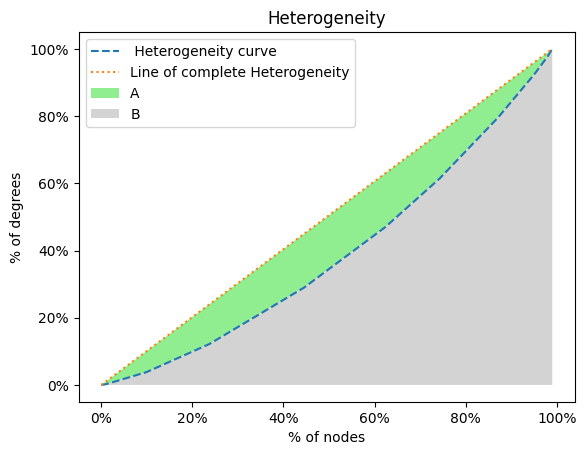

In [6]:
g = nx.erdos_renyi_graph(100, 0.05)
gc = Graph_comparator(g)
gc.plot_degrees()

# Graphs

In [7]:
df = pd.DataFrame(columns=['graph-name','H'])

### Path Graph

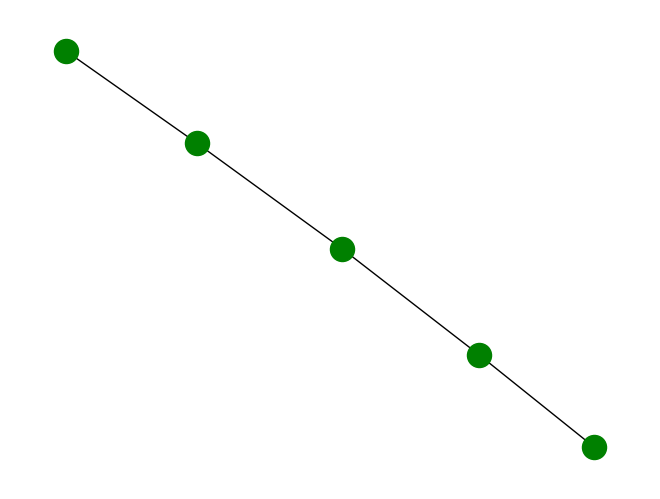

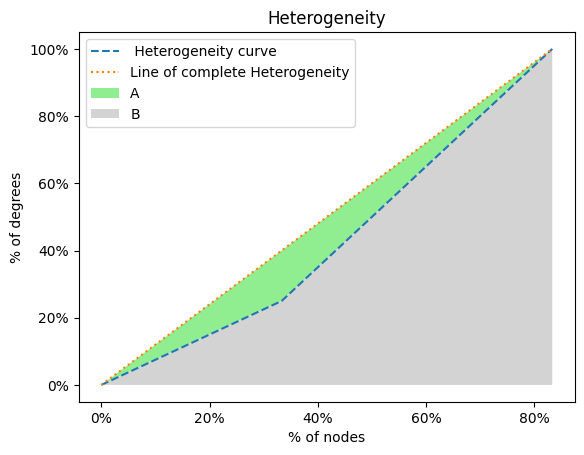

0.15


<ipython-input-8-b6b8aa8df184>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Path Graph','H': h}, ignore_index = True)


In [8]:
path_graph = nx.path_graph(5)
nx.draw(path_graph, node_color='green')
plt.show()
gc = Graph_comparator(path_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Path Graph','H': h}, ignore_index = True)

### Regular graph (Lattice) or K-nearest-neighbor

In [9]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

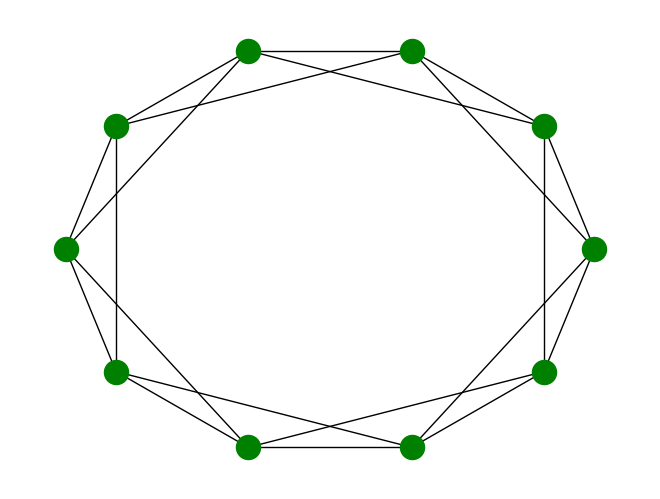

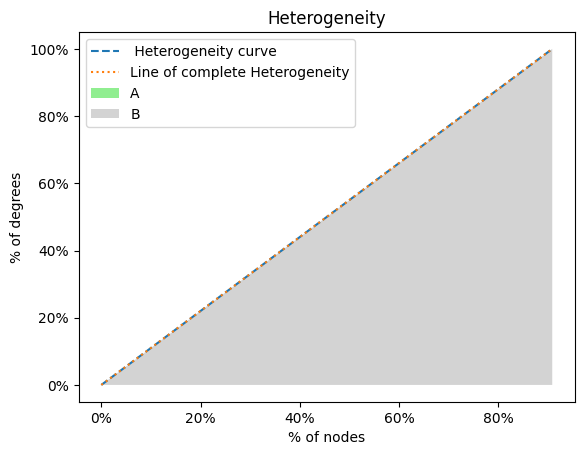

0.0


<ipython-input-10-d59896fb1c08>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'K-nearest-neighbor Graph','H': h}, ignore_index = True)


In [10]:
lattice = make_ring_lattice(10, 4)
nx.draw_circular(lattice, node_color='green')
plt.show()
gc = Graph_comparator(lattice)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'K-nearest-neighbor Graph','H': h}, ignore_index = True)

### Complete graph

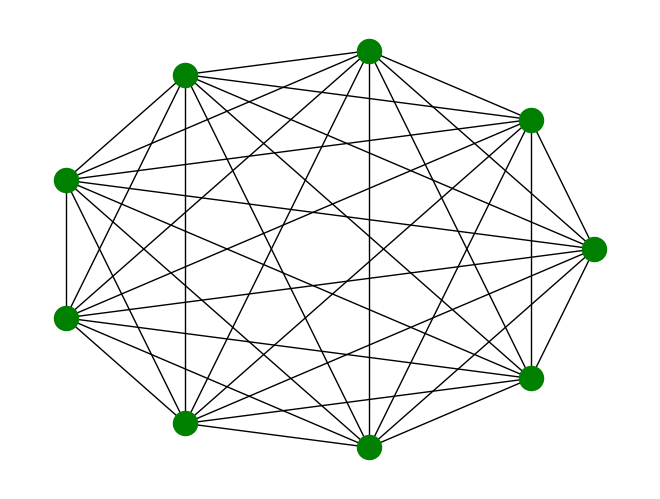

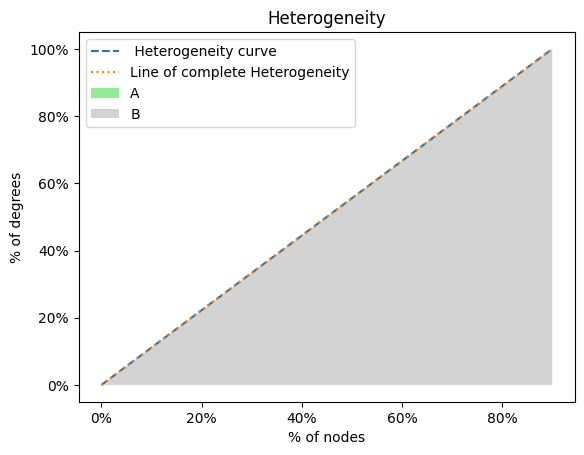

0.0


<ipython-input-11-d1324273f22b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Complete Graph','H': h}, ignore_index = True)


In [11]:
complete = nx.complete_graph(9)
nx.draw_circular(complete, node_color='green')
plt.show()
gc = Graph_comparator(complete)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Complete Graph','H': h}, ignore_index = True)

### Star graph

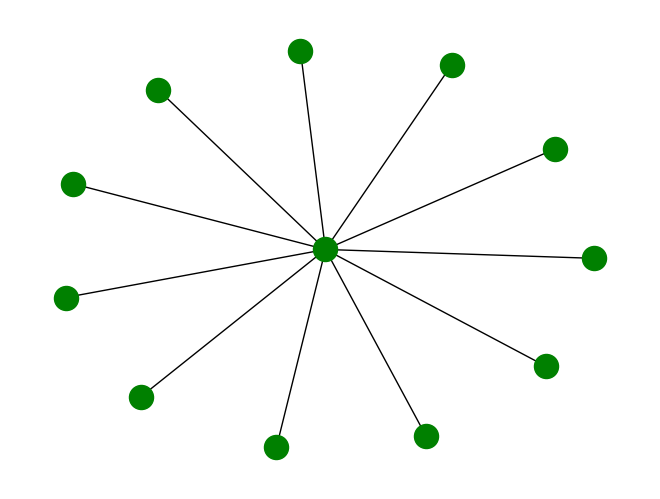

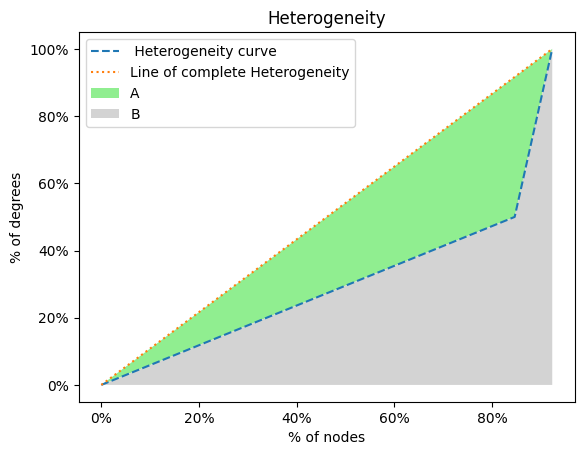

0.4166666666666667


<ipython-input-12-9991d84b8d2b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Star Graph','H': h}, ignore_index = True)


In [12]:
star_graph = nx.star_graph(11)
nx.draw(star_graph, node_color='green')
plt.show()
gc = Graph_comparator(star_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Star Graph','H': h}, ignore_index = True)

### connected star graph

In [13]:
def generate_connected_star_graph(hub, leaf):
  graph = nx.cycle_graph(hub)
  graph.add_nodes_from(list(range(hub, hub*leaf + hub)))
  for node in range(hub):
    for i in range(leaf):
      graph.add_edge(node, node*leaf + i + hub)
  return graph

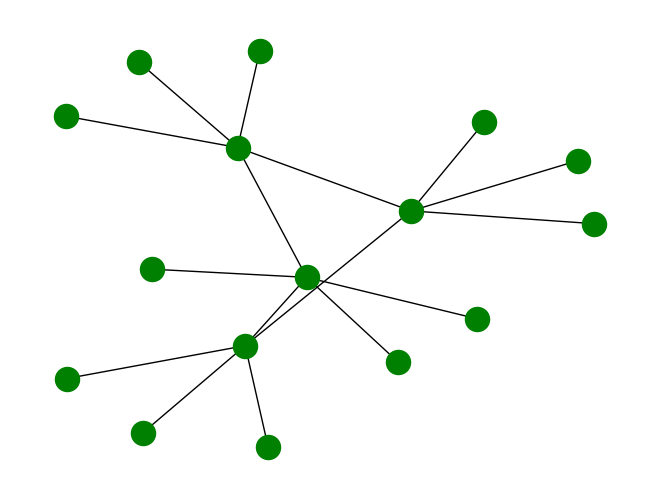

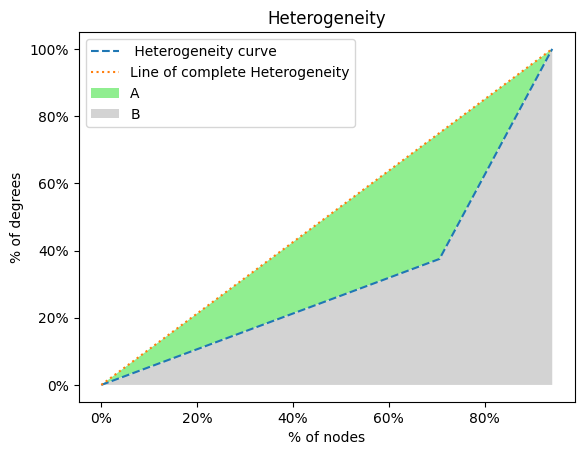

0.375


<ipython-input-14-c621c4b47394>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Connected Star Graph','H': h}, ignore_index = True)


In [14]:
connected_star_graph = generate_connected_star_graph(4, 3)
nx.draw(connected_star_graph, node_color='green')
plt.show()
gc = Graph_comparator(connected_star_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Connected Star Graph','H': h}, ignore_index = True)

### Rich-hub star graph

In [15]:
def generate_rich_hub_star_graph(hub, leaf):
  graph = nx.complete_graph(hub)
  graph.add_nodes_from(list(range(hub, hub*leaf + hub)))
  for node in range(hub):
    for i in range(leaf):
      graph.add_edge(node, node*leaf + i + hub)
  return graph

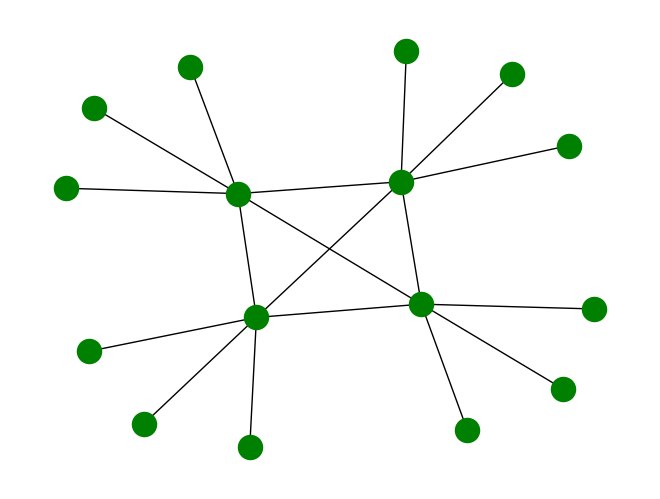

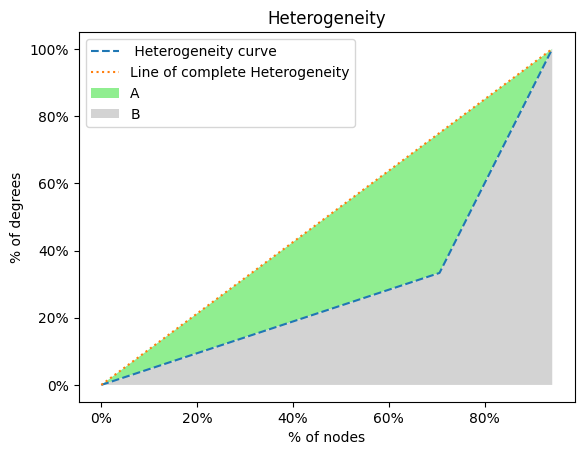

0.4166666666666667


<ipython-input-16-430c370b8757>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Rich-Hub Star Graph','H': h}, ignore_index = True)


In [16]:
rich_hub_star_graph = generate_rich_hub_star_graph(4, 3)
nx.draw(rich_hub_star_graph, node_color='green')
plt.show()
gc = Graph_comparator(rich_hub_star_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Rich-Hub Star Graph','H': h}, ignore_index = True)

### comparison

In [21]:
df

,graph-name,H
0,Path Graph,0.150000
1,K-nearest-neighbor Graph,0.000000
2,Complete Graph,0.000000
3,Star Graph,0.416667
4,Connected Star Graph,0.375000
5,Rich-Hub Star Graph,0.416667
